<font size = 8 color ='336EFF'>Perceptron</font>

Import Relevant Libraries

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt


From sklearn.linear_model import Perceptron set max_iter, tol, and random_state to 1000, 1e-3, and 42 respectively

Load iris dataset. Select petal length and petal width as X and from iris.target create y with setosa and not setosa (e.g. y=1 if setosa and y = 0 if not setosa)

Train the perceptron

In [2]:
# your code
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

In [4]:
print(iris_dataset.target_names)
print(iris_dataset.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
X = iris_dataset.data[:, 2:]
y = np.array([1 if i == 0 else 0 for i in iris_dataset.target])
data = np.column_stack((X, y))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data_train, data_test = train_test_split(data,
                                         test_size=0.2,
                                         random_state=42,
                                         shuffle=True)

Plot the real X and y

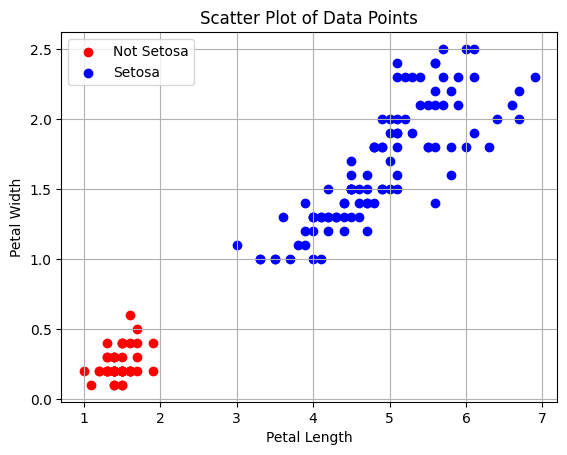

In [8]:
setosa = [data[i] for i in range(len(data)) if data[i][2] == 0]
not_setosa = [data[i] for i in range(len(data)) if data[i][2] == 1]

x_class_0 = [point[0] for point in not_setosa]
y_class_0 = [point[1] for point in not_setosa]
x_class_1 = [point[0] for point in setosa]
y_class_1 = [point[1] for point in setosa]

plt.scatter(x_class_0, y_class_0, color='red', label='Not Setosa')
plt.scatter(x_class_1, y_class_1, color='blue', label='Setosa')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

In [10]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]

In [11]:
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

In [12]:
perceptron = perceptron.fit(X=X_train, y=y_train)
perceptron

Perceptron(random_state=42)

In [13]:
y_pred = np.array(perceptron.predict(X=X_test))
print(y_pred)

[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1.]


In [14]:
data_pred = np.column_stack((data_test[:, :-1], y_pred))

Plot X real and y predicted

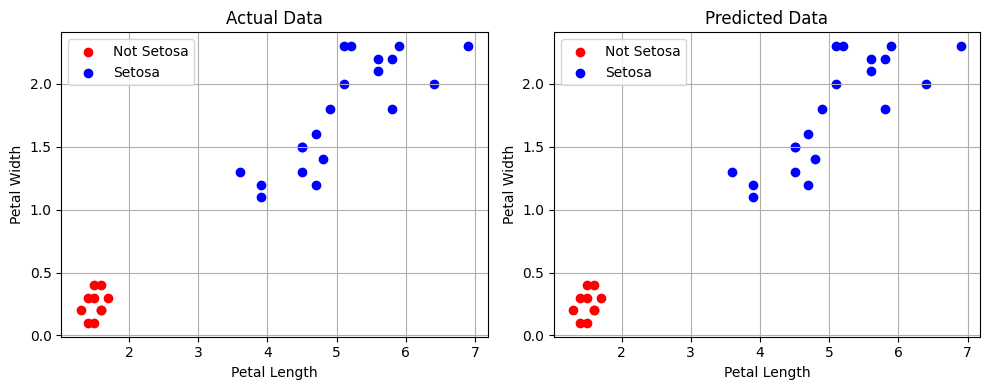

In [15]:
# your code
setosa = [data_test[i] for i in range(len(data_test)) if data_test[i][2] == 0]
not_setosa = [data_test[i] for i in range(len(data_test)) if data_test[i][2] == 1]

x_class_0 = [point[0] for point in not_setosa]
y_class_0 = [point[1] for point in not_setosa]
x_class_1 = [point[0] for point in setosa]
y_class_1 = [point[1] for point in setosa]

########
setosa_pred = [data_pred[i] for i in range(len(data_test)) if data_pred[i][2] == 0]
not_setosa_pred = [data_pred[i] for i in range(len(data_test)) if data_pred[i][2] == 1]

x_class_0_pred = [point[0] for point in not_setosa_pred]
y_class_0_pred = [point[1] for point in not_setosa_pred]
x_class_1_pred = [point[0] for point in setosa_pred]
y_class_1_pred = [point[1] for point in setosa_pred]


fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First Subplot (Actual Data)
axs[0].scatter(x_class_0, y_class_0, color='red', label='Not Setosa')
axs[0].scatter(x_class_1, y_class_1, color='blue', label='Setosa')

axs[0].set_xlabel('Petal Length')
axs[0].set_ylabel('Petal Width')
axs[0].set_title('Actual Data')
axs[0].legend()
axs[0].grid(True)

# Second Subplot (Predicted Data)
axs[1].scatter(x_class_0_pred, y_class_0_pred, color='red', label='Not Setosa')
axs[1].scatter(x_class_1_pred, y_class_1_pred, color='blue', label='Setosa')

axs[1].set_xlabel('Petal Length')
axs[1].set_ylabel('Petal Width')
axs[1].set_title('Predicted Data')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()  # Adjust spacing between subplots to prevent overlap
plt.show()

Predict new point [[2, 0.5]]

In [16]:
# your code
y_pred_new = np.array(perceptron.predict(X=[[2, 0.5]]))
y_pred_new

array([1.])

Print the accuracy score

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
accuracy = accuracy_score(y_test, y_pred)

In [19]:
accuracy

1.0

Calculate the confusion matrix print it and then plot it

In [20]:
# your code
report = classification_report(y_test, y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix:
[[20  0]
 [ 0 10]]


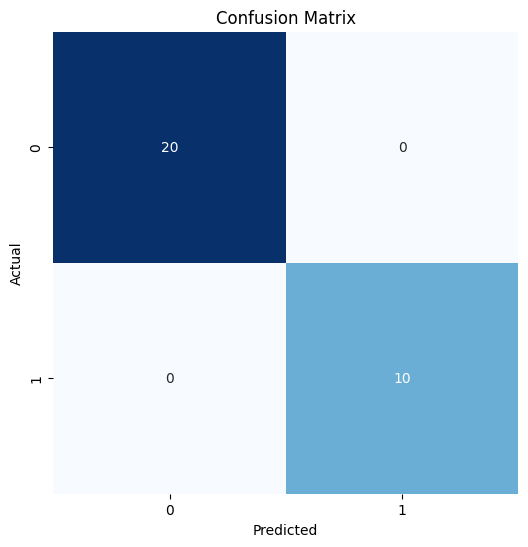

In [22]:
# your code
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
y_predicted = perceptron.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()